In [1]:
import pandas as pd
import numpy as np

In [2]:
churnData = pd.read_csv("churn_data.csv")
customerData = pd.read_csv("customer_data.csv")
internetData = pd.read_csv("internet_data.csv")

In [3]:
df_l = pd.merge(churnData, customerData, how="inner", on="customerID")
telecom = pd.merge(df_l, internetData, how="inner", on="customerID")
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [4]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
telecom["PhoneService"] = telecom["PhoneService"].map({"Yes":1, "No":0})
telecom["PaperlessBilling"] = telecom["PaperlessBilling"].map({"Yes":1, "No":0})
telecom["Churn"] = telecom["Churn"].map({"Yes":1, "No":0})
telecom["Partner"] = telecom["Partner"].map({"Yes":1, "No":0})
telecom["Dependents"] = telecom["Dependents"].map({"Yes":1, "No":0})

In [7]:
cont = pd.get_dummies(telecom["Contract"], prefix= "Contract", drop_first=True)
telecom = pd.concat([telecom, cont], axis= 1)

cont = pd.get_dummies(telecom["PaymentMethod"], prefix= "PaymentMethod", drop_first=True)
telecom = pd.concat([telecom, cont], axis= 1)

cont = pd.get_dummies(telecom["gender"], prefix= "gender", drop_first=True)
telecom = pd.concat([telecom, cont], axis= 1)

cont = pd.get_dummies(telecom["MultipleLines"], prefix= "MultipleLines")
ml1 = cont.drop(["MultipleLines_No phone service"], 1)
telecom = pd.concat([telecom, ml1], axis= 1)

cont = pd.get_dummies(telecom["InternetService"], prefix= "InternetService", drop_first=True)
telecom = pd.concat([telecom, cont], axis= 1)

cont = pd.get_dummies(telecom["OnlineSecurity"], prefix= "OnlineSecurity")
ml1 = cont.drop(["OnlineSecurity_No internet service"], 1)
telecom = pd.concat([telecom, ml1], axis= 1)

cont = pd.get_dummies(telecom["OnlineBackup"], prefix= "OnlineBackup")
ml1 = cont.drop(["OnlineBackup_No internet service"], 1)
telecom = pd.concat([telecom, ml1], axis= 1)

cont = pd.get_dummies(telecom["DeviceProtection"], prefix= "DeviceProtection")
ml1 = cont.drop(["DeviceProtection_No internet service"], 1)
telecom = pd.concat([telecom, ml1], axis= 1)

cont = pd.get_dummies(telecom["TechSupport"], prefix= "TechSupport")
ml1 = cont.drop(["TechSupport_No internet service"], 1)
telecom = pd.concat([telecom, ml1], axis= 1)

cont = pd.get_dummies(telecom["StreamingTV"], prefix= "StreamingTV")
ml1 = cont.drop(["StreamingTV_No internet service"], 1)
telecom = pd.concat([telecom, ml1], axis= 1)

cont = pd.get_dummies(telecom["StreamingMovies"], prefix= "StreamingMovies")
ml1 = cont.drop(["StreamingMovies_No internet service"], 1)
telecom = pd.concat([telecom, ml1], axis= 1)

telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [8]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [9]:
telecom = telecom.drop(["Contract", "PaymentMethod", "gender", 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis= 1)

In [10]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [11]:
telecom["TotalCharges"] = telecom["TotalCharges"].convert_objects(convert_numeric=True)

C:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [12]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

In [13]:
num_telecom = telecom[["tenure", "MonthlyCharges", "SeniorCitizen", "TotalCharges"]]
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [18]:
telecom.isnull

<bound method DataFrame.isnull of       customerID  tenure  PhoneService  PaperlessBilling  MonthlyCharges  \
0     7590-VHVEG       1             0                 1           29.85   
1     5575-GNVDE      34             1                 0           56.95   
2     3668-QPYBK       2             1                 1           53.85   
3     7795-CFOCW      45             0                 0           42.30   
4     9237-HQITU       2             1                 1           70.70   
5     9305-CDSKC       8             1                 1           99.65   
6     1452-KIOVK      22             1                 1           89.10   
7     6713-OKOMC      10             0                 0           29.75   
8     7892-POOKP      28             1                 1          104.80   
9     6388-TABGU      62             1                 0           56.15   
10    9763-GRSKD      13             1                 1           49.95   
11    7469-LKBCI      16             1                

In [19]:
telecom = telecom[~np.isnan(telecom["TotalCharges"])]

In [20]:
df = telecom[["tenure", "MonthlyCharges", "TotalCharges"]]
normalized_df = (df- df.mean())/df.std()

In [21]:
telecom = telecom.drop(["tenure", "MonthlyCharges", "TotalCharges"], axis= 1)

In [23]:
telecom = pd.concat([telecom, normalized_df], axis= 1)
telecom.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,1,0,1,0,-1.280157,-1.161611,-0.994123,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0.064298,-0.260859,-0.173727,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,1,0,1,0,-1.239416,-0.363897,-0.959581,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0.512450,-0.747797,-0.195234,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,1,0,1,0,-1.239416,0.196164,-0.940391,-1.239416,0.196164,-0.940391


In [24]:
churn = (sum(telecom["Churn"])/len(telecom["Churn"].index)) * 100
churn

26.578498293515356

In [25]:
from sklearn.model_selection import train_test_split
X = telecom.drop(["customerID", "Churn"], axis = 1)
y = telecom["Churn"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3, random_state= 100) 

In [27]:
import statsmodels.api as sm
logml = sm.GLM(ytrain, (sm.add_constant(Xtrain)), family= sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 03 Jun 2019   Deviance:                       4009.4
Time:                        18:00:35   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2783      1.187     -2.762      0.006      -5.605      -0.952
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4348      1.324     -2.594      0.009      -6.030      -0.839
OnlineSecurity_No                         0.0905      0.058      1.558      0.119      -0.023       0.204
OnlineSecurity_Yes                        0.0660      0.174      0.380      0.704      -0.275       0.407
OnlineBackup_No                          -0.0088      0.055     -0.161      0.872      -0.116       0.098
OnlineBackup_Yes                          0.1653      0.172      0.960      0.337      -0.172       0.503
DeviceProtection_No                      -0.0832      0.056     -1.487      0.137      -0.193       0.026
DeviceProtection_Yes                      0.2397      0.174      1.379      0.168      -0.101       0.580
TechSupport_No                            0.0935      0.058      1.604      0.109      -0.021       0.208
TechSupport_Yes                           0.0630      0.174      0.362      0.717      -0.278       0.404
StreamingTV_No                           -0.4016      0.133     -3.027      0.002      -0.662      -0.142
StreamingTV_Yes                           0.5581      0.267      2.094      0.036       0.036       1.081
StreamingMovies_No                       -0.3459      0.133     -2.609      0.009      -

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

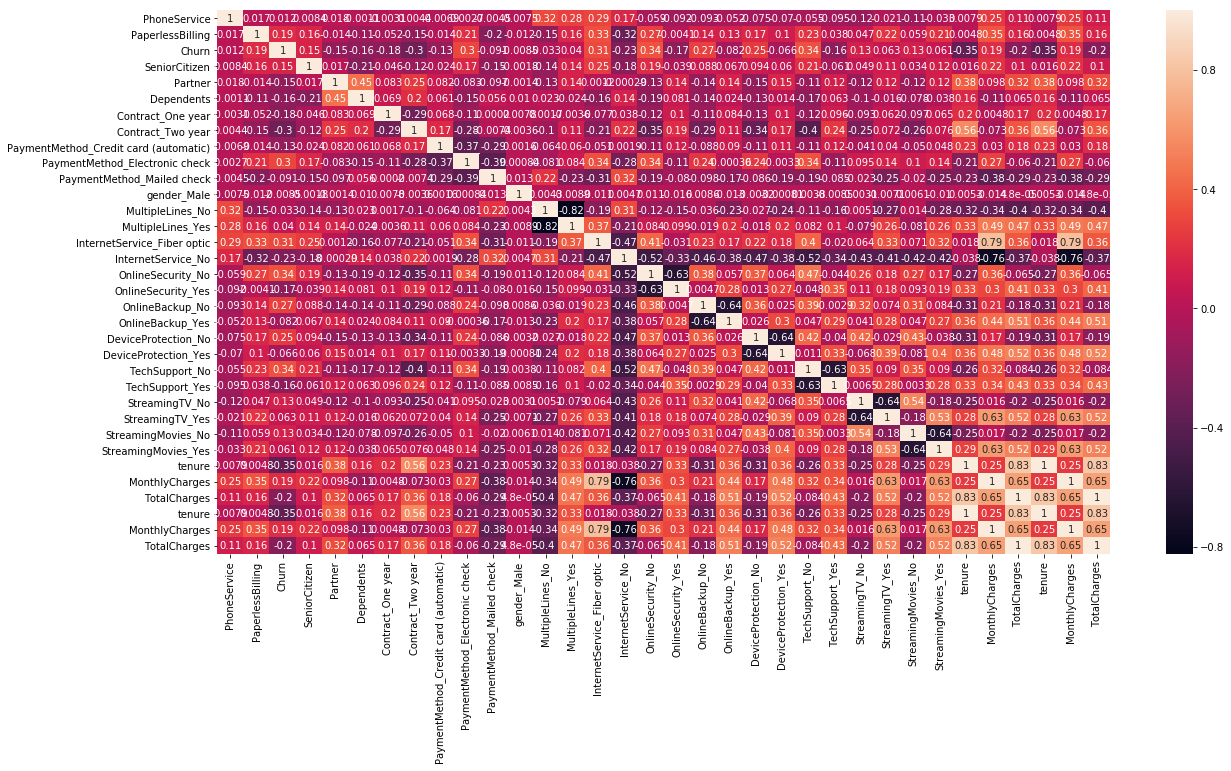

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(telecom.corr(), annot= True)

In [31]:
X.columns

Index(['PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'tenure', 'MonthlyCharges', 'TotalCharges', 'tenure', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [32]:
Xtest2 = Xtest.drop(["MultipleLines_No", 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'], axis= 1)
Xtrain2 = Xtrain.drop(["MultipleLines_No", 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'], axis= 1)

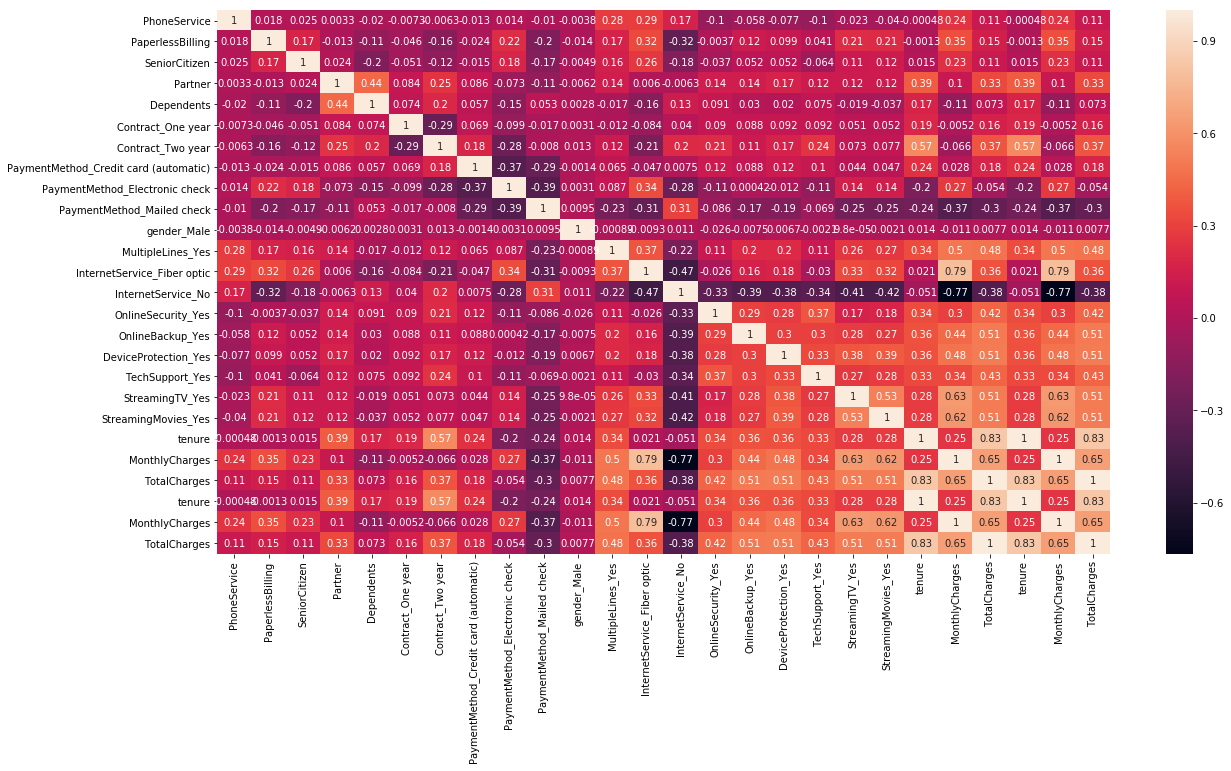

In [33]:
plt.figure(figsize=(20, 10))
sns.heatmap(Xtrain2.corr(), annot= True)

In [34]:
logm2 = sm.GLM(ytrain, (sm.add_constant(Xtrain2)), family= sm.families.Binomial())
logm2.fit().summary()

C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 03 Jun 2019   Deviance:                       4009.4
Time:                        18:05:50   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -0.7599      0.095     -8.015      0.000      -0.946      -0.574
MonthlyCharges                           -1.0908      0.580     -1.880      0.060      -2.228       0.046
TotalCharges                              0.3664      0.099      3.705      0.000       0.173       0.560
tenure                                   -0.7599      0.095     -8.015      0.000      -0.946      -0.574
MonthlyCharges                           -1.0908      0.580     -1.880      0.060      -2.228       0.046
TotalCharges                              0.3664      0.099      3.705      0.000       

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True False False False  True  True False  True False False False
 False  True  True False  True False False False False False  True False
 False False False  True False  True  True False  True]
[ 1  1  4 21  8  1  1 14  1 15 17  2 11  1  1  6  1 18  7 16 13  9  1  5
 19  3 20  1 12  1  1 10  1]


C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'MultipleLines_No', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_No', 'tenure', 'TotalCharges']

In [39]:
from sklearn import metrics

logsk = LogisticRegression()
logsk.fit(Xtrain[col], ytrain)

C:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
logm3 = sm.GLM(ytrain, (sm.add_constant(Xtrain[col])), family= sm.families.Binomial())
logm3.fit().summary()

C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.4
Date:                Mon, 03 Jun 2019   Deviance:                       4042.8
Time:                        18:12:29   Pearson chi2:                 6.18e+03
No. Iterations:                   100   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9094      0.176     -5.179      0.000      -1.254      -0.565
PhoneService                      -0.3085      0.173     -1.783      0.075      -0.647       0.031
PaperlessBilling                   0.3516      0.089      3.937      0.000       0.177       0.527
Contract_One year                 -0.7144      0.127     -5.611      0.000      -0.964      -0.465
Contract_Two year                 -1.3260      0.210     -6.327      0.000      -1.737      -0.915
PaymentMethod_Electronic check     0.3094      0.092      3.365      0.001       0.129       0.490
PaymentMethod_Mailed check        -0.1527      0.120     -1.269      0.205      -0.389       0.083
MultipleLines_No                  -0.2275      0.095     -2.396      0.017      -0.414      -0.041
InternetService_Fiber optic        0.7729      0.117      6.604      0.000       0.543       1.002
InternetService_No                -1.2119      0.184     -6.581      0.000      -1.573      -0.851
OnlineSecurity_Yes                -0.4093      0.102     -4.017      0.000      -0.609      -0.210
TechSupport_Yes                   -0.4176      0.101     -4.132      0.000      -0.616      -0.220
StreamingTV_No                    -0.2691      0.094     -2.860      0.004      -0.454      -0.085
tenure                            -0.7508      0.092     -8.191      0.000      -0.930      -0.571
tenure                            -0.7508      0.092     -8.191      0.000      -0.930      -0.571
TotalCharges                       0.3581      0.093      3.840      0.000       0.175       0.541
TotalCharges                       0.3581      0.093      3.840      0.000       0.175       0.541
==================================================================================================
"""